In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("../../db/proyectomacro.db")
df = pd.read_sql("SELECT * FROM exportaciones_minerales_totales", conn)
df.set_index('año', inplace=True)
df.index = df.index.astype(int)
conn.close()
df.tail()

,estaño_volumen,estaño_valor,plomo_volumen,plomo_valor,zinc_volumen,zinc_valor,plata_volumen,plata_valor,wolfram_volumen,wolfram_valor,cobre_volumen,cobre_valor,antimonio_volumen,antimonio_valor,oro_volumen,oro_valor
año,,,,,,,,,,,,,,,,
2019,15277.4,285996.0,86937.5,172280.1,519320.9,1334751.9,1157.5,593905.5,1341.6,16999.8,4042.0,24009.2,2585.3,17449.3,39.0,1738646.7
2020,11743.7,203973.5,59480.5,110181.3,354007.6,817045.7,887.6,600614.6,1698.9,20588.8,3241.3,20534.0,2468.3,14165.4,22.7,1234373.5
2021,18316.0,565204.8,90231.8,196609.7,465332.6,1380953.3,1250.0,1017163.2,1970.8,31271.3,3218.8,29706.0,2928.7,30807.2,44.1,2534694.8
2022,15472.6,514373.6,89435.9,193541.2,518263.6,1818114.6,1238.3,865056.3,1712.8,29316.1,3705.0,32264.1,3351.9,43477.2,52.3,3007920.7
2023,15725.9,407366.5,99852.4,213853.6,497866.8,1326273.3,1328.4,998491.1,1897.8,31863.0,4326.6,36423.6,3742.3,43907.6,40.8,2487043.4


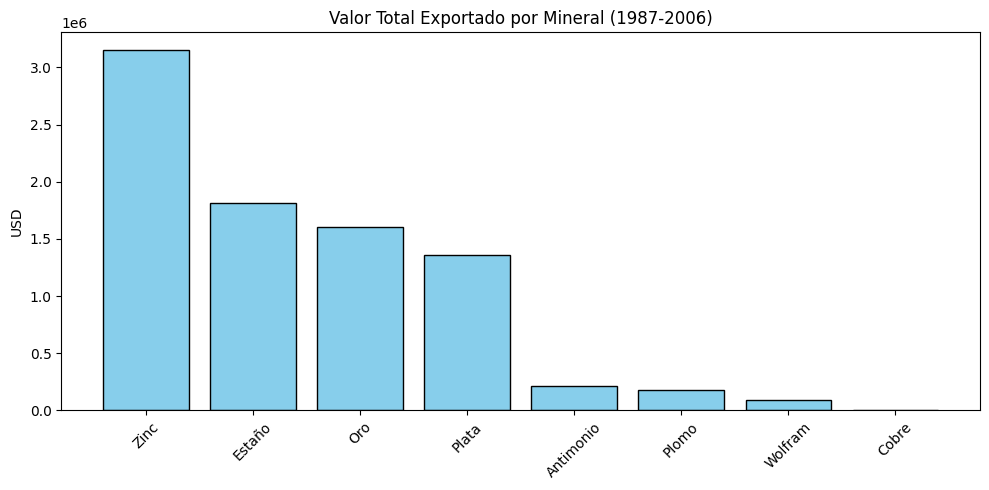

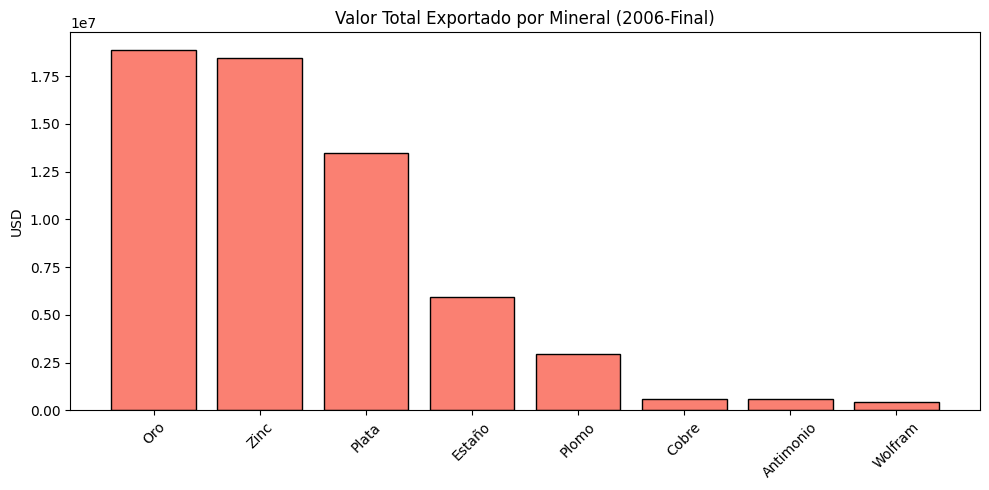

In [10]:
# Seleccionar solo las columnas de valor (miles de USD)
valor_columns = [col for col in df.columns if 'valor' in col]

# Filtrar los datos por periodo
df_87_06 = df.loc[1987:2006, valor_columns]
df_06_final = df.loc[2006:, valor_columns]

# Sumar el valor total por mineral en cada periodo
total_valores_87_06 = df_87_06.sum().sort_values(ascending=False)
total_valores_06_final = df_06_final.sum().sort_values(ascending=False)

# Renombrar los índices para mayor claridad
total_valores_87_06.index = total_valores_87_06.index.str.replace('_valor', '').str.capitalize()
total_valores_06_final.index = total_valores_06_final.index.str.replace('_valor', '').str.capitalize()

# Gráfico 1987-2006
plt.figure(figsize=(10, 5))
plt.bar(total_valores_87_06.index, total_valores_87_06, color='skyblue', edgecolor='black')
plt.title('Valor Total Exportado por Mineral (1987-2006)')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2006-final
plt.figure(figsize=(10, 5))
plt.bar(total_valores_06_final.index, total_valores_06_final, color='salmon', edgecolor='black')
plt.title('Valor Total Exportado por Mineral (2006-Final)')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

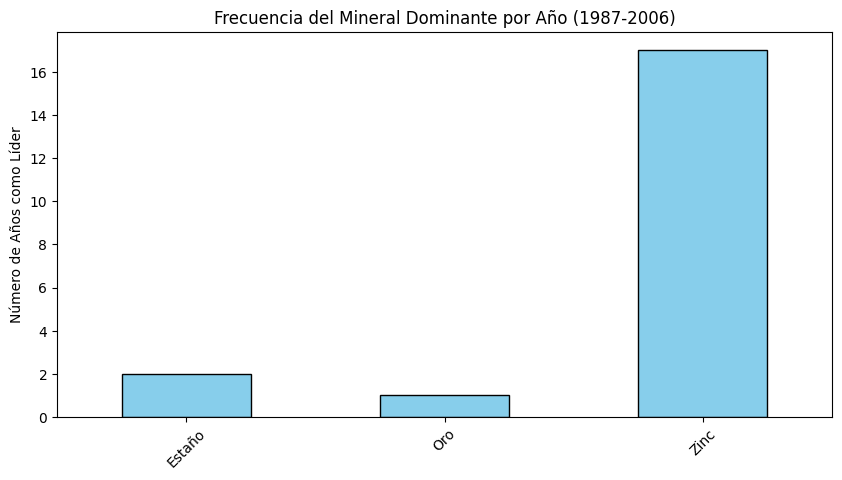

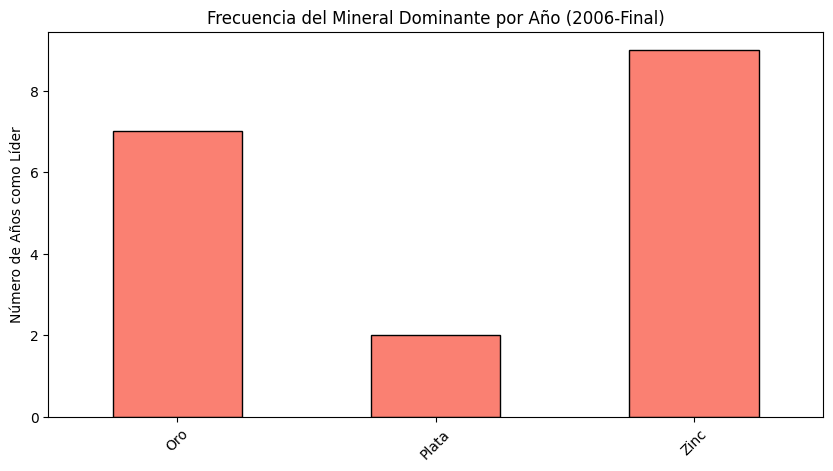

In [13]:
# Calcular la participación anual
participacion_87_06 = df_87_06.div(df_87_06.sum(axis=1), axis=0) * 100
participacion_06_final = df_06_final.div(df_06_final.sum(axis=1), axis=0) * 100

# Obtener el mineral dominante en cada año
mineral_dominante_87_06 = participacion_87_06.idxmax(axis=1).str.replace('_valor', '').str.capitalize()
mineral_dominante_06_final = participacion_06_final.idxmax(axis=1).str.replace('_valor', '').str.capitalize()

# Graficar para 1987-2006
plt.figure(figsize=(10, 5))
mineral_dominante_87_06.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia del Mineral Dominante por Año (1987-2006)')
plt.ylabel('Número de Años como Líder')
plt.xticks(rotation=45)
plt.show()

# Graficar para 2006-final
plt.figure(figsize=(10, 5))
mineral_dominante_06_final.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Frecuencia del Mineral Dominante por Año (2006-Final)')
plt.ylabel('Número de Años como Líder')
plt.xticks(rotation=45)
plt.show()

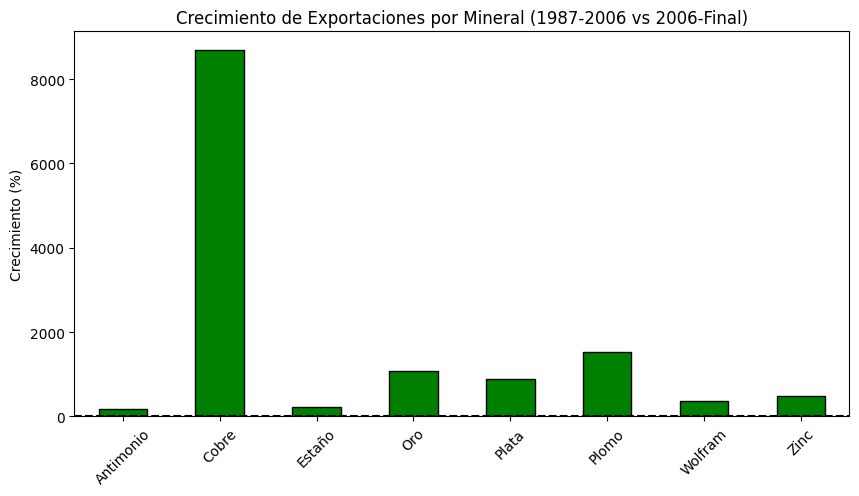

In [12]:
# Calcular crecimiento relativo entre los períodos
crecimiento = ((total_valores_06_final - total_valores_87_06) / total_valores_87_06) * 100

# Graficar el crecimiento relativo
plt.figure(figsize=(10, 5))
crecimiento.plot(kind='bar', color='green', edgecolor='black')
plt.title('Crecimiento de Exportaciones por Mineral (1987-2006 vs 2006-Final)')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
